# EDA MOVIES


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
movies = pd.read_csv("../Dataset/movies_etl.csv", parse_dates=["release_date"])

# configuramos pandas para mostrar todas las columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
# Vemos la descripción de los datos y sus estadísticas.
movies.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,release_year,return,collection_id,collection_name,collection_poster_path,collection_backdrop_path,normalized_production_companies,normalized_production_countries,normalized_spoken_languages,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,1995,12.451801,10194.0,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,['Pixar Animation Studios'],['US'],['en'],0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035,NaN,NaN,NaN,NaN,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['US'],"['en', 'fr']",0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000,119050.0,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,"['Warner Bros.', 'Lancaster Gate']",['US'],['en'],0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,5.090760,NaN,NaN,NaN,NaN,['Twentieth Century Fox Film Corporation'],['US'],['en'],0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,0.000000,96871.0,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,"['Sandollar Productions', 'Touchstone Pictures']",['US'],['en'],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Vemos la descripción de los datos
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   budget                           45376 non-null  int64         
 1   id                               45376 non-null  int64         
 2   original_language                45365 non-null  object        
 3   overview                         44435 non-null  object        
 4   popularity                       45376 non-null  float64       
 5   release_date                     45376 non-null  datetime64[ns]
 6   revenue                          45376 non-null  float64       
 7   runtime                          45130 non-null  float64       
 8   status                           45296 non-null  object        
 9   tagline                          20398 non-null  object        
 10  title                            45376 non-null  object   

## Tratamiento de nulos


### Porcentaje de nulos

Total de datos nulos: 195100
Total de datos: 1905792
Porcentaje de datos nulos: 10.24%


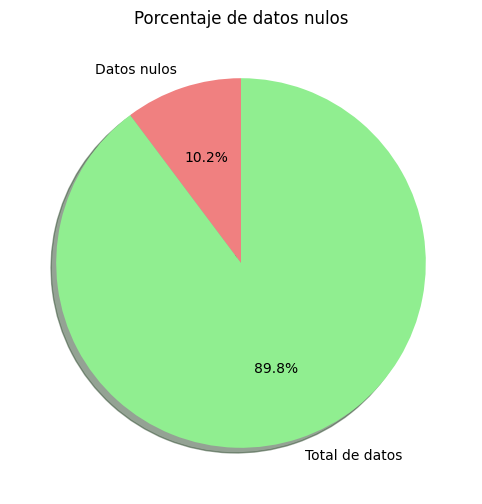

In [5]:
# Calculamos el porcentaje de valores nulos
total_nulos = movies.isna().sum().sum()
total_datos = movies.size
pct_nulos = (total_nulos / total_datos) * 100

# Imprimimos el porcentaje de los datos nulos
print(f"Total de datos nulos: {total_nulos}")
print(f"Total de datos: {total_datos}")
print(f"Porcentaje de datos nulos: {pct_nulos:.2f}%")

# preparamos el grafico
datos = [total_nulos, total_datos - total_nulos]
labels = ["Datos nulos", "Total de datos"]


# Graficamos el porcentaje de datos nulos
plt.figure(figsize=(8, 6))
plt.pie(datos, labels=labels, autopct='%1.1f%%', colors=["lightcoral", "lightgreen"],shadow=True, startangle=90)
plt.title("Porcentaje de datos nulos")
plt.show()

### Tratamos los nulos

In [6]:
movies.isna().sum()

budget                                 0
id                                     0
original_language                     11
overview                             941
popularity                             0
release_date                           0
revenue                                0
runtime                              246
status                                80
tagline                            24978
title                                  0
vote_average                           0
vote_count                             0
release_year                           0
return                                 0
collection_id                      42211
collection_name                    42211
collection_poster_path             42211
collection_backdrop_path           42211
normalized_production_companies        0
normalized_production_countries        0
normalized_spoken_languages            0
Action                                 0
Adventure                              0
Animation       

Analizando el resultado, podemos asumir que tagline y las collections tienen demasiados datos nulos por lo que es ideal eliminar esas columnas.

In [7]:
movies.drop(["tagline", "collection_id", "collection_name", "collection_poster_path", "collection_backdrop_path"], axis=1, inplace=True)

En el caso de overview, no hay tratamiendo de imputacion que podamos hacer por lo tanto sus registros seran eliminados, tomando en cuenta que nuestros datos son suficientes para que no afecte al dataset.

In [8]:
movies.dropna(subset=["overview"], inplace=True)

Analizaremos que tipos de datos tenemos en original_language y status

In [9]:
print(movies["original_language"].value_counts())

original_language
en    32134
fr     2278
ja     1346
it     1264
de      962
es      924
ru      783
hi      506
ko      444
zh      406
sv      367
cn      313
pt      295
fi      227
nl      226
da      222
pl      202
cs      125
tr      112
el      105
no      103
fa       99
hu       91
ta       78
th       76
he       65
sr       63
ro       54
te       45
ar       38
ml       36
xx       33
hr       29
bn       29
mr       24
is       24
tl       23
et       22
id       20
ka       18
sl       17
uk       16
lv       16
bs       14
ca       12
vi       10
bg       10
sk        9
lt        9
ab        9
ur        8
nb        6
wo        5
sh        5
ms        5
mk        5
sq        5
kn        3
eu        3
ky        3
kk        3
ku        3
bm        3
pa        2
ne        2
ps        2
iu        2
mn        2
af        2
am        2
bo        2
lo        2
gl        1
rw        1
uz        1
sm        1
eo        1
hy        1
lb        1
mt        1
ay        1
zu        

In [10]:
print(movies["status"].value_counts())

status
Released           44029
Rumored              217
Post Production       96
In Production         16
Planned               12
Canceled               1
Name: count, dtype: int64


Viendo el resultados de los datos podemos tomar la decision de utilizar la moda para imputar esos datos.

In [11]:
# Llenamos los valores nulos de la columna original_language con el valor mas frecuente
movies["original_language"] = movies["original_language"].fillna(movies["original_language"].mode()[0])

# Llenamos los valores nulos de la columna status con el valor mas frecuente
movies["status"] = movies["status"].fillna(movies["status"].mode()[0])


Y verificamos la cantidad de nulos y graficamos

Total de datos: 1644095
Cantidad de datos nulos: 0


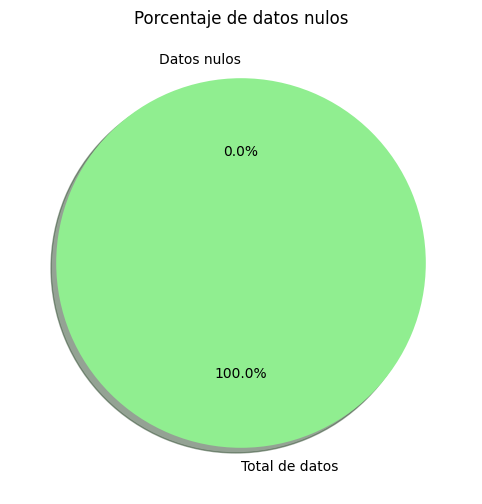

In [12]:
total_datos = movies.size
total_nulos = movies.isna().sum().sum()

print("Total de datos:", total_datos)
print("Cantidad de datos nulos:", total_nulos)

datos = [total_nulos, total_datos - total_nulos]
labels = ["Datos nulos", "Total de datos"]

# Graficamos el porcentaje de datos nulos
plt.figure(figsize=(8, 6))
plt.pie(datos, labels=labels, autopct='%1.1f%%', colors=["lightcoral", "lightgreen"],shadow=True, startangle=90)
plt.title("Porcentaje de datos nulos")
plt.show()


# Duplicados

In [13]:
print("Cantidad de datos duplicados:", movies.duplicated().sum())
movies[movies.duplicated(keep=False)].drop("overview", axis=1).sort_values("title")


Cantidad de datos duplicados: 17


,budget,id,original_language,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,return,normalized_production_companies,normalized_production_countries,normalized_spoken_languages,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
13256,0,141971,fi,0.411949,2008-12-26,0.0,108.0,Released,Blackout,6.7,3.0,2008,0.0,['Filmiteollisuus Fine'],['FI'],['fi'],0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
13370,0,141971,fi,0.411949,2008-12-26,0.0,108.0,Released,Blackout,6.7,3.0,2008,0.0,['Filmiteollisuus Fine'],['FI'],['fi'],0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
16757,0,141971,fi,0.411949,2008-12-26,0.0,108.0,Released,Blackout,6.7,3.0,2008,0.0,['Filmiteollisuus Fine'],['FI'],['fi'],0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
17220,0,25541,da,2.587911,2009-10-21,0.0,90.0,Released,Brotherhood,7.1,21.0,2009,0.0,[],"['SE', 'DK']",['da'],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
23017,0,25541,da,2.587911,2009-10-21,0.0,90.0,Released,Brotherhood,7.1,21.0,2009,0.0,[],"['SE', 'DK']",['da'],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
39980,980000,298721,th,2.535419,2015-09-02,0.0,122.0,Released,Cemetery of Splendour,4.4,50.0,2015,0.0,"['Match Factory, The', 'Louverture Films', 'To...","['GB', 'US', 'FR', 'TH', 'DE', 'MY', 'KR', 'MX...","['en', 'th']",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
33144,980000,298721,th,2.535419,2015-09-02,0.0,122.0,Released,Cemetery of Splendour,4.4,50.0,2015,0.0,"['Match Factory, The', 'Louverture Films', 'To...","['GB', 'US', 'FR', 'TH', 'DE', 'MY', 'KR', 'MX...","['en', 'th']",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
22125,0,18440,en,1.436085,2007-01-01,0.0,89.0,Released,Days of Darkness,5.0,5.0,2007,0.0,[],['US'],['en'],1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
13994,0,18440,en,1.436085,2007-01-01,0.0,89.0,Released,Days of Darkness,5.0,5.0,2007,0.0,[],['US'],['en'],1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
24814,0,11115,en,6.880365,2008-01-29,0.0,85.0,Released,Deal,5.2,22.0,2008,0.0,"['Andertainment Group', 'Crescent City Picture...",['US'],['en'],0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Eliminamos los datos duplicados

In [14]:
movies.drop_duplicates(inplace=True)
print("Número de datos duplicados:", movies.duplicated().sum())

Número de datos duplicados: 0


# Distribucion de los datos

### Estadisticas del dataset

In [15]:
# Mostramos la descripción de los datos y sus estadísticas.
# Uso el with para limitar los decimales y sea entendible 
with pd.option_context('display.float_format', '{:.5f}'.format):
    print(movies.describe())

               budget           id  popularity                   release_date  \
count     44418.00000  44418.00000 44418.00000                          44418   
mean    4319572.82019 106663.68436     2.97627  1992-04-16 04:21:00.461974912   
min           0.00000      2.00000     0.00000            1874-12-09 00:00:00   
25%           0.00000  25904.25000     0.40620            1978-07-25 12:00:00   
50%           0.00000  58404.50000     1.16306            2001-08-11 00:00:00   
75%           0.00000 152609.00000     3.81376            2010-12-10 00:00:00   
max   380000000.00000 469172.00000   547.48830            2020-12-16 00:00:00   
std    17615239.22566 111604.80922     6.06252                            NaN   

               revenue     runtime  vote_average  vote_count  release_year  \
count      44418.00000 44418.00000   44418.00000 44418.00000   44418.00000   
mean    11470434.08481    95.02931       5.64393   112.26573    1991.80006   
min            0.00000     0.00000  

### Distribucion del histograma

array([[<Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'popularity'}>],
       [<Axes: title={'center': 'release_date'}>,
        <Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'runtime'}>],
       [<Axes: title={'center': 'vote_average'}>,
        <Axes: title={'center': 'vote_count'}>,
        <Axes: title={'center': 'return'}>]], dtype=object)

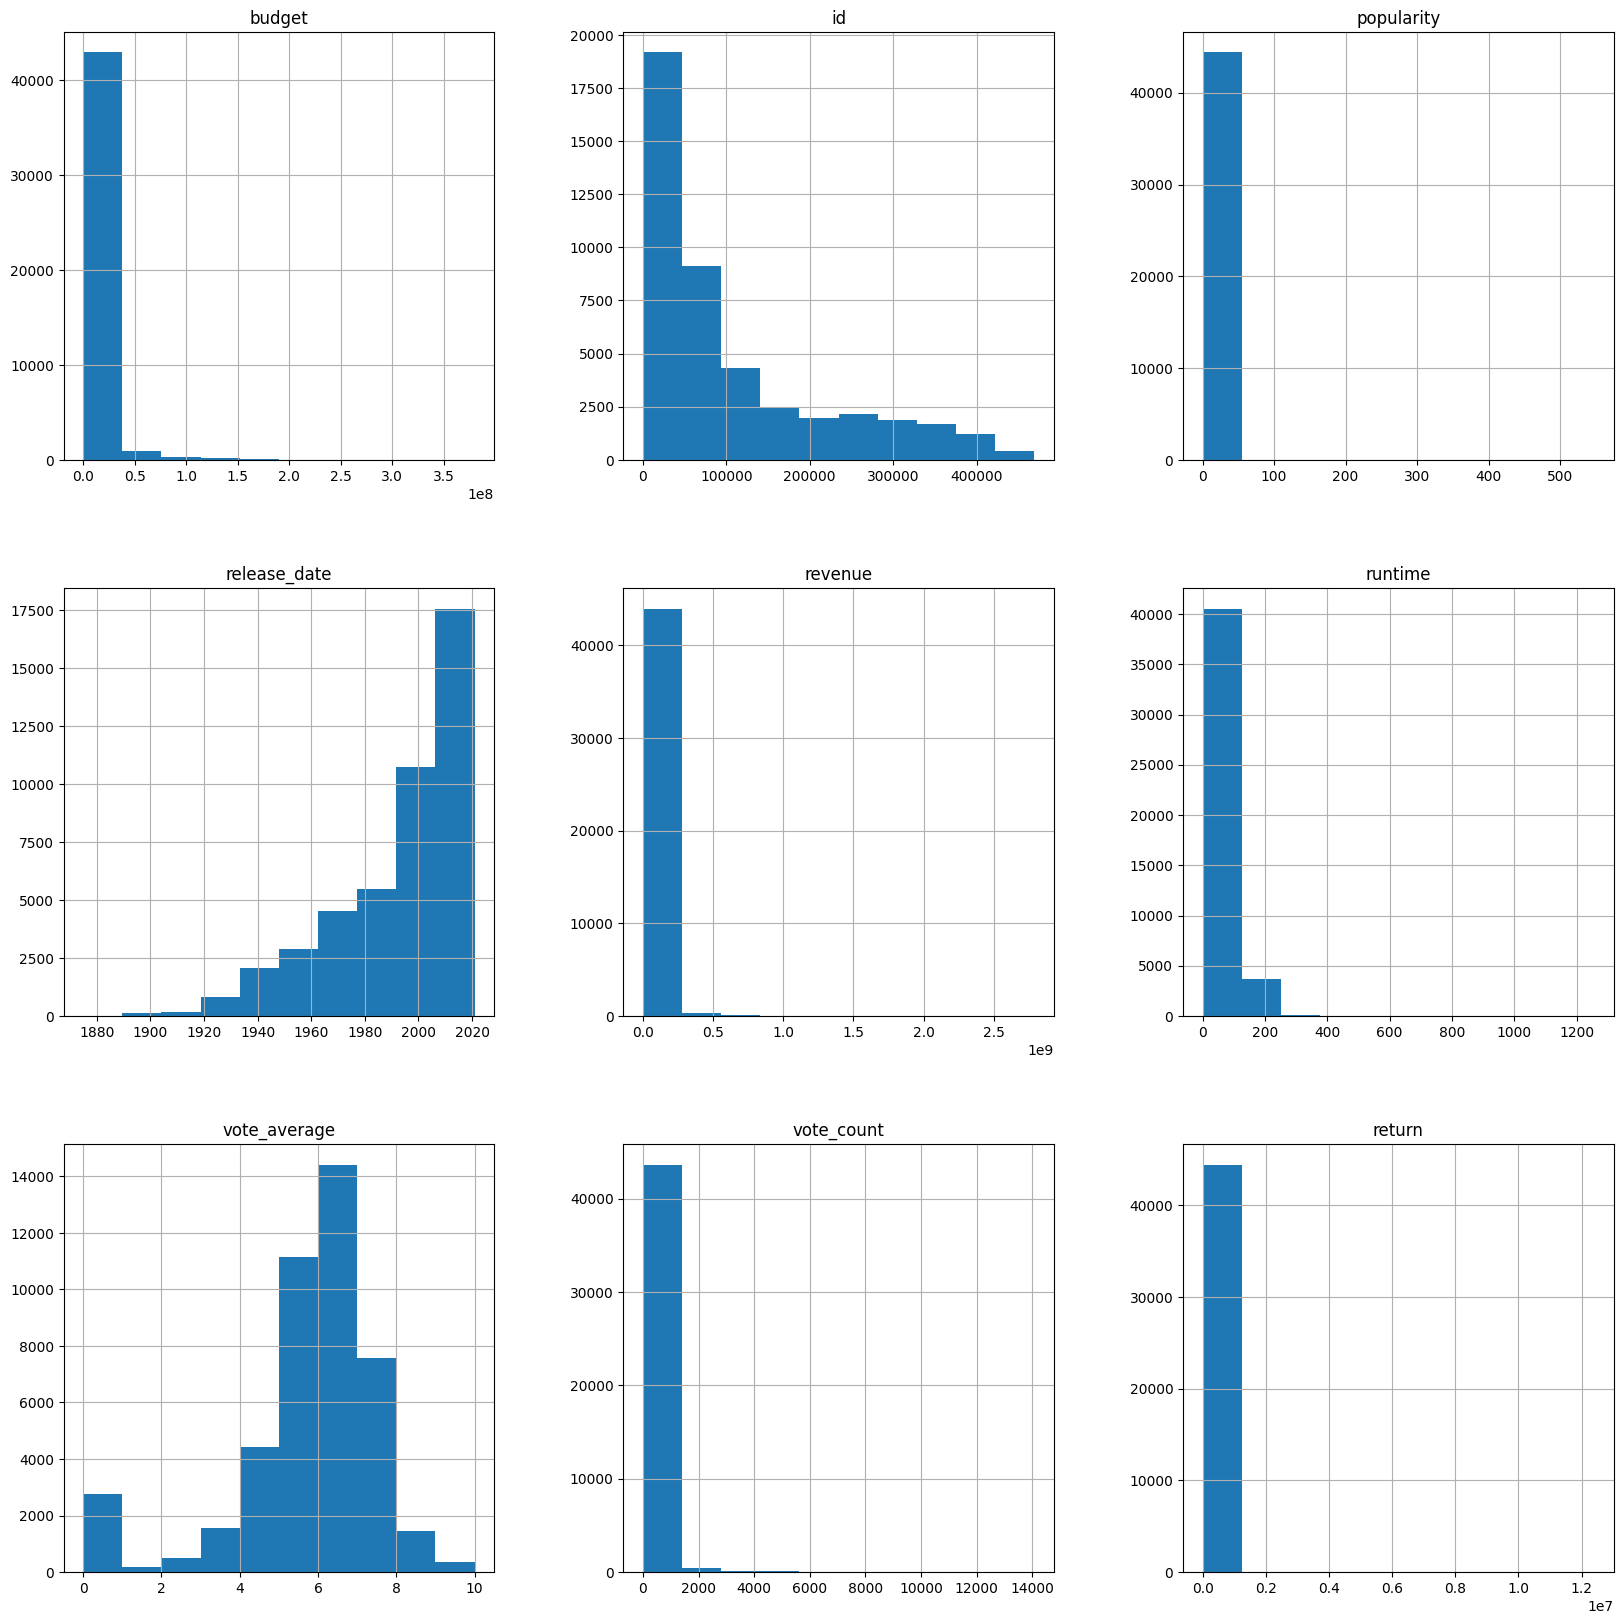

In [16]:
movies.hist(["budget", "id", "popularity", "release_date", "revenue", "runtime", "vote_average", "vote_count", "return"],figsize=(20, 20))

# Nube de letras

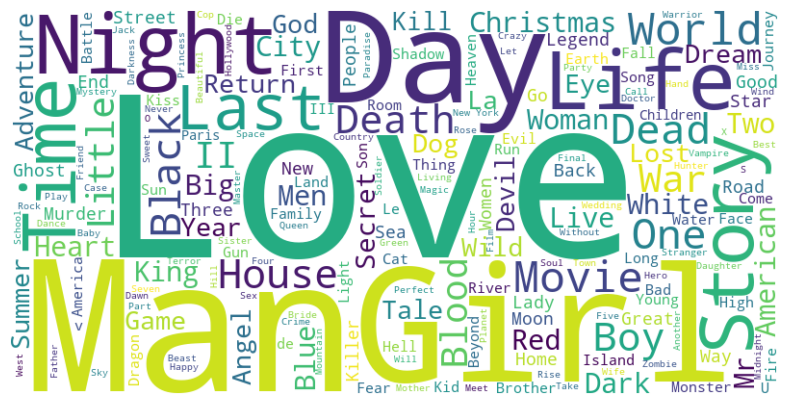

In [17]:
text = ' '.join(movies['title'].values)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Guardar el dataset

In [18]:
movies.to_csv("../Dataset/Cleaned/movies_clean.csv", index=False)